In [159]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats


In [160]:
pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [161]:

df = pd.read_csv('/Users/rachyc/Downloads/experiment_dataset.csv')
print(df.head())

   Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR
0           0   62  Location2  Device2    Control   13.928669  0.084776
1           1   18  Location1  Device1  Variant B   11.310518  0.096859
2           2   21  Location2  Device1  Variant B   24.842100  0.097630
3           3   21  Location1  Device3  Variant B   20.061300  0.109783
4           4   57  Location1  Device2  Variant B   34.495503  0.068579


In [162]:
# Conducting ANOVA test to compare all 3 groups
variant_A = df[df['Variant']=='Variant A']['CTR']
variant_B = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(variant_A, variant_B, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


In [163]:
# Conducting t-test to compare individual variants to the Control, and to each other.
variant_A =df[df['Variant']== 'Variant A']['CTR']
variant_B =df[df['Variant']== 'Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']
p_val = stats.ttest_ind(variant_A, control)
p_val_2 = stats.ttest_ind(variant_B, control)
p_val_3 = stats.ttest_ind(variant_A, variant_B)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


<Axes: xlabel='CTR', ylabel='Count'>

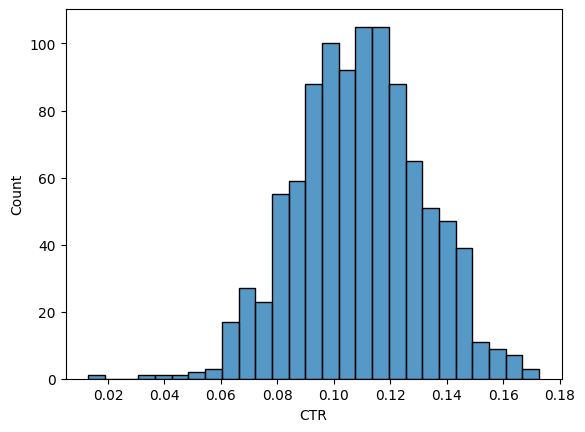

In [164]:
sns.histplot(df.reset_index()['CTR'])

<Axes: xlabel='Variant', ylabel='CTR'>

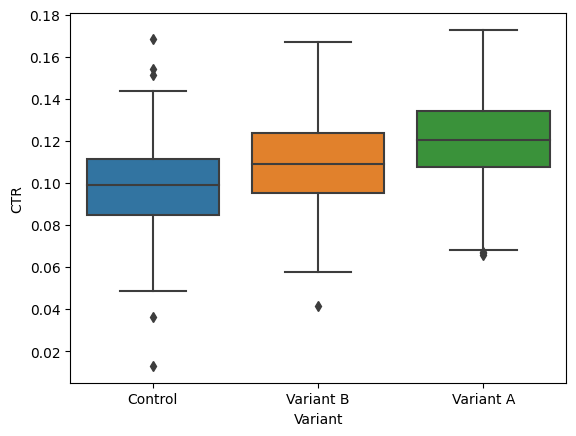

In [165]:
# using boxplot to see which feature has the higher value
sns.boxplot(data = df.reset_index(), x = 'Variant', y ='CTR')

In [166]:
# grouping by "Variant" and examining the mean and median values for Variant A and Variant B
df_grouped=df.groupby('Variant')

In [167]:
df_grouped['CTR'].mean()

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64

In [168]:
df_grouped['CTR'].median()

Variant
Control      0.098895
Variant A    0.120203
Variant B    0.109100
Name: CTR, dtype: float64

In [169]:
variant_A = df[df['Variant']=='Variant A']['Time Spent']
variant_B = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(variant_A, variant_B, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [170]:
variant_A =df[df['Variant']== 'Variant A']['Time Spent']
variant_B =df[df['Variant']== 'Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']
p_val = stats.ttest_ind(variant_A, control)
p_val_2 = stats.ttest_ind(variant_B, control)
p_val_3 = stats.ttest_ind(variant_A, variant_B)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


<Axes: xlabel='Time Spent', ylabel='Count'>

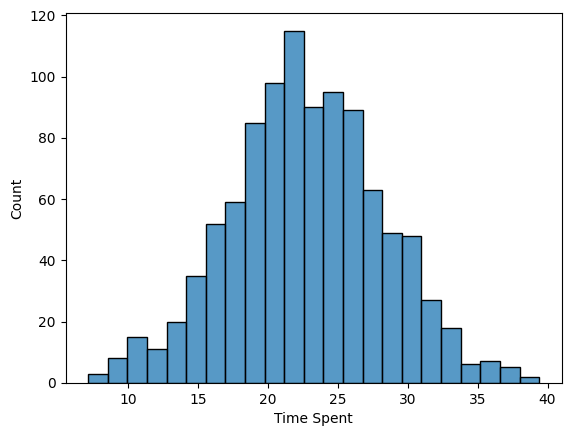

In [171]:
sns.histplot(df.reset_index()['Time Spent'])

<Axes: xlabel='Variant', ylabel='Time Spent'>

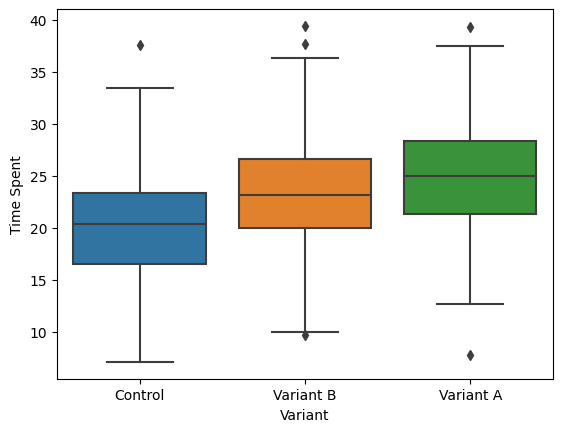

In [172]:
sns.boxplot(data = df.reset_index(), x = 'Variant', y ='Time Spent')

In [173]:
df_grouped=df.groupby('Variant')

In [174]:
df_grouped['Time Spent'].mean()

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

In [175]:
df_grouped['Time Spent'].median()

Variant
Control      20.337480
Variant A    24.955120
Variant B    23.198123
Name: Time Spent, dtype: float64

# 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

+ (Please see the code above)

# 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

+ (Please see the code above)

# 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

+ Firstly, a ANOVA test was conducted to determine whether there is a statistically significant difference between Variant A,B and the control group regarding Click-Through-Rate (CTR) and Time Spent (TS). The results indicate that the p-value is <0.05 for both CTR and TS. Therefore, it can be concluded that there is a statistically significant difference between Variant A,B and the control group in terms of both CTR and TS.

+ Based on the ANOVA, we see that both the Click-Through-Rate (CTR) and Time Spent (TS) have statistically significant results. This means that the variants and the control group have completely different behaviours in their Click-Through-Rate (CTR) and Time Spent (TS).

+ Therefore, we conduct an independent t-test next for each variant compared to the control, and then the variants compared to each other. When comparing Click-Through-Rate (CTR) and Time Spent (TS), we see there are significant differences between both variants and the control. This means we should have one variant that performs better than the others.

+ Moreover, I used boxplot to see which feature has the higher value regarding CTR and TS. The box plots indicate that Variant A has higher values than Variant B, and the control group has the lowest values.

+ Lastly, by grouping the data by "Variant" and examining the mean and median values for Variant A and Variant B, it was further tested whether Variant A's values are higher than Variant B's in terms of CTR and TS. The analysis confirms that Variant A has significantly higher values than Variant B for both CTR and TS.

+ In summary, there is a significant difference observed between Variant A, Variant B, and the control group in terms of both CTR and TS. Based on these findings, it is recommended to the engineering team that deploying feature Variant A would be a better choice, as it exhibits significantly higher values compared to both the control group and feature Variant B for both CTR and TS.

# 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

+ The speed at which the feature can be introduced to the audience will depend on its complexity. If the feature is less complex, a faster roll-out plan can be implemented. For example, the roll-out plan for a straightforward feature could involve the following steps: 1) Testing for feature functions (10%) 2) Alpha testing (25%) 3) Making improvements (75%), and 4) Releasing the feature. (100%)

+ However, if the feature is complex, a more gradual roll-out plan is recommended. This may include additional steps such as planning(5%), testing for feature functions(10%), alpha testing(25%), making improvements(50%), user training(75%), and then releasing the feature(100%). This gradual approach ensures that the feature is thoroughly tested, refined, and users are adequately trained before its full release.


